# Pandas_Introduction3
Im creating these series for people that have beginner/intermediate knowledge about pandas library.I m going to share my working notes(after tidying) to pass the info,nothing more. Certain codeblocks could get repetitive. Some info looks contradictory even though i have tried to remove most of them. Sorry for it beforehand. Also goodluck on your learning journey. This is my first kernel as well. Wish me luck. Contact me for any question, i will help you out if i can.

Contents:
* [Groupby in Pandas](#1)
* [Exploring Pandas Series](#2)
* [Handling missing data](#3)
* [Pandas Index](#4)


<a id="1"></a> 
## Groupby in Pandas

In [1]:
import pandas as pd

In [2]:
drinks=pd.read_csv("../input/drinks.csv")

In [3]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [4]:
drinks.beer_servings.mean()

106.16062176165804

In [5]:
#lets look beer_serving by continent
#drinks.beer_servings.groupby("continent").mean() gives an error bcs u should group them first then look statistical values.
drinks.groupby("continent").beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [6]:
drinks.groupby("continent").beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [7]:
#what if we want to specify +1 math calculations at once.
drinks.groupby("continent").beer_servings.agg(["count","min","max","mean"])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [8]:
#its a dataframe
type(drinks.groupby("continent").beer_servings.agg(["count","min","max","mean"]))

pandas.core.frame.DataFrame

In [9]:
#bonus tips.
#u dont have to specify colname when u use groupby, let's see the result.
drinks.groupby("continent").mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


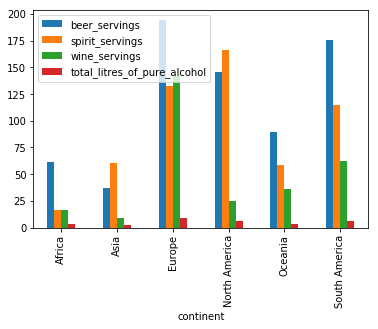

In [10]:
#if u want to plot small plot about code above
%matplotlib inline
drinks.groupby("continent").mean().plot(kind="bar")

<a id="2"></a> 
## Exploring Pandas Series

In [11]:
import pandas as pd

In [12]:
movies=pd.read_csv("../input/imdb_1000.csv")

In [13]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [14]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [15]:
#gives info about values in specific column-VERY IMPORTANT METHOD TO LEARN,DONT FORGET THAT.
movies.genre.describe()

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [16]:
#counts the number of occurence of each unique value in certain col-VERY IMPORTANT METHOD TO LEARN, DONT FORGET THAT.
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [17]:
#percentage based-normalized count
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
Fantasy      0.001021
History      0.001021
Name: genre, dtype: float64

In [18]:
#what are the unique values of genre col.
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [19]:
#count of unique genre col val
movies.genre.nunique()

16

In [20]:
#creates a table that has row as genre cols as content_rating with their COUNTS-VERY IMPORTANT FOR DATA PREPROCESSING!!
pd.crosstab(movies.genre,movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [21]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [22]:
#if u want to get info from the descr method
movies.duration.mean()

120.97957099080695

In [23]:
#this col doesnt have categorical data lets call value_count for this col and see the results.
movies.duration.value_counts()
#23 movies has a duration of 112 mins etc..value_counts() mostly used with categorical data.

112    23
113    22
102    20
101    20
129    19
120    18
105    18
126    18
98     18
130    18
100    17
121    17
116    17
124    16
122    16
118    16
115    16
96     16
104    16
110    16
107    16
109    16
119    15
114    15
99     15
108    15
94     14
117    14
106    14
93     14
       ..
70      1
69      1
67      1
66      1
242     1
238     1
195     1
229     1
224     1
220     1
216     1
212     1
207     1
205     1
202     1
201     1
200     1
194     1
159     1
193     1
187     1
186     1
184     1
183     1
182     1
180     1
177     1
168     1
166     1
64      1
Name: duration, Length: 133, dtype: int64

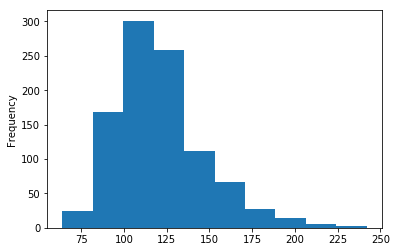

In [24]:
%matplotlib inline
movies.duration.plot(kind="hist")

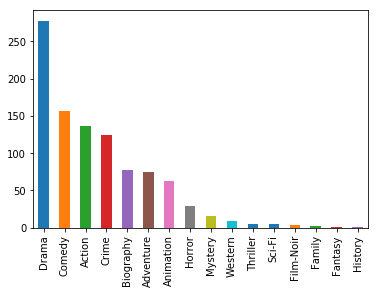

In [25]:
movies.genre.value_counts().plot(kind="bar")

In [26]:
#documentation
#http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html              describe function
#http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html          value_counts
#http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html                unique
#http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html               nunique
#http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html                     crosstab
#http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mean.html                  mean
#http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html                  plot


<a id="3"></a> 
## Handling missing data

In [27]:
import pandas as pd

In [28]:
ufo=pd.read_csv("../input/ufo.csv")

In [29]:
#nan stands for missing data/not a number/missing value.read_csv detect the missing data and flagged it as nan
#lets give an ex for nan in csv format Ybor,,OVAL,FL,12/31/2000 23:59. double comma means nan.
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [30]:
#because isnull is a method and tail is a method also we use double ()
ufo.isnull().tail()
#if any cols data has nan then isnull ll show it to us as True

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [31]:
#reverse of isnull-pretty simple nan=false, non-nan=true
ufo.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


In [32]:
#counts true as 1 false as 0 so result of sum gives us null/nan values from each col.
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [33]:
#another ex to get a clear understanding
pd.Series([True,False,False]).sum()

1

In [34]:
#col base sum =axis=0
ufo.isnull().sum(axis=0)

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [35]:
#if we only want to use nan values/we can create filter for df-generally we dont want to see nan values so this isnt general approach
ufo[ufo.City.isnull()]

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


In [36]:
#more general approach
ufo[ufo.City.notnull()]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00


In [37]:
#how to handle nan values-drop them
ufo.shape

(18241, 5)

In [38]:
#how=any means drop any row that has nan as a value.dropna has inplace=false by def so if u call ufo again nan is still there
ufo.dropna(how="any").shape

(2486, 5)

In [39]:
ufo.shape

(18241, 5)

In [40]:
ufo.isnull().sum(axis=0)

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [41]:
#lets modify dropna to get what we want.
ufo.dropna(how="all").shape
#because state and time has no nan values if u use how=all u cant drop any rows/nan values

(18241, 5)

In [42]:
#if u want to check specific rows use subset arg
ufo.dropna(subset=["City","Shape Reported"],how="any").shape

(15576, 5)

In [43]:
#bonus tips
#[].value_counts also gives u a some sort of result(wrong one but gives it anyway) bcs that value_counts is attr not a method
ufo["Shape Reported"].value_counts()
#if u want to see how many time each value occured its good idea to use value_counts.MISSING VALUES EXCLUDED.

LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
PYRAMID         1
FLARE           1
HEXAGON         1
DOME            1
Name: Shape Reported, dtype: int64

In [44]:
#now nan values are included.
ufo["Shape Reported"].value_counts(dropna=False)

LIGHT        2803
NaN          2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
FLARE           1
PYRAMID         1
HEXAGON         1
DOME            1
Name: Shape Reported, dtype: int64

In [45]:
#if we want to replace nan with sth else...
ufo["Shape Reported"].fillna(value="Varies",inplace=True)
ufo["Shape Reported"].value_counts()

LIGHT        2803
Varies       2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
PYRAMID         1
FLARE           1
HEXAGON         1
DOME            1
Name: Shape Reported, dtype: int64

<a id="4"></a> 
## Pandas Index

In [46]:
import pandas as pd
drinks=pd.read_csv("../input/drinks.csv")

In [47]:
drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa
192,Zimbabwe,64,18,4,4.7,Africa


In [48]:
#from row 0 to row 192. index sts referred as label
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [49]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [50]:
drinks.shape

(193, 6)

In [51]:
pd.read_table("../input/u.user",
             header=None,sep="|").head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [52]:
#why index exist-> 3 reasons. IDENTIFICATION,SELECTION,ALIGNMENT.WE COVERED FIRST 2, 3RD ONE LL BE COVERED LATER.

In [53]:
#as u can see row numbers dont re-labelled.so its used as identification.
drinks[drinks.continent=="South America"]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
6,Argentina,193,25,221,8.3,South America
20,Bolivia,167,41,8,3.8,South America
23,Brazil,245,145,16,7.2,South America
35,Chile,130,124,172,7.6,South America
37,Colombia,159,76,3,4.2,South America
52,Ecuador,162,74,3,4.2,South America
72,Guyana,93,302,1,7.1,South America
132,Paraguay,213,117,74,7.3,South America
133,Peru,163,160,21,6.1,South America
163,Suriname,128,178,7,5.6,South America


In [54]:
#to get value u want.selection.
drinks.loc[23,"beer_servings"]

245

In [55]:
drinks=pd.read_csv("../input/drinks.csv")
#to understand why we use indexes we set the country as an index.
drinks.set_index("country",inplace=True)
#u dont have to use ["country"] list just "country" series is fine.
drinks.head()
#that country row thats hanging out there is name. u can see it if u call .index method

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [56]:
drinks=pd.read_csv("../input/drinks.csv")
drinks.set_index(["country"],inplace=True)
drinks.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [57]:
drinks.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [58]:
drinks=pd.read_csv("../input/drinks.csv")
drinks.set_index(["country"],inplace=True)
drinks.shape

(193, 5)

In [59]:
drinks.loc["Albania","beer_servings"]

89

In [60]:
#drinks.index.name="country" this part commented out, we resetted the indexes back to their place.
drinks.reset_index(inplace=True)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [61]:
#bonus tip
#describe is dataframe so it has indexes also.
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [62]:
drinks.describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [63]:
drinks.describe().columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [64]:
drinks.describe().loc["25%","beer_servings"]

20.0